In [9]:
### Show Dataset
print(df)

          Company Valuation Date Joined                         Industry  \
0       Bytedance     $180B  2017-04-07          Artificial intelligence   
1          SpaceX     $100B  2012-12-01                            Other   
2           SHEIN     $100B  2018-07-03  E-commerce & direct-to-consumer   
3          Stripe      $95B  2014-01-23                          Fintech   
4          Klarna      $46B  2011-12-12                          Fintech   
...           ...       ...         ...                              ...   
1069     Zhaogang       $1B  2017-06-29  E-commerce & direct-to-consumer   
1070  Zhuan Zhuan       $1B  2017-04-18  E-commerce & direct-to-consumer   
1071     Zihaiguo       $1B  2021-05-06                Consumer & retail   
1072         Zopa       $1B  2021-10-19                          Fintech   
1073        Zwift       $1B  2020-09-16  E-commerce & direct-to-consumer   

               City         Country      Continent  Year Founded Funding  \
0          

In [39]:
### The newest Unicorn Companies that joined in the past Three Months

df['Date Joined'] = pd.to_datetime(df['Date Joined'])

today = datetime.now()

three_months_ago = today - timedelta(days=90)


new_unicorns = df[df['Date Joined'] > three_months_ago]

print(new_unicorns)
        

NameError: name 'datetime' is not defined

In [23]:
### How long does it usually take for a company to become a unicorn? Has it always 
been this way?

df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df['Year Joined'] = df['Date Joined'].dt.year


df['Years to Unicorn'] = df['Year Joined'] - df['Year Founded']

average_years = df['Years to Unicorn'].mean()

print(f"The average time it takes for a company to become a unicorn is {average_years:.2f} years.")



The average time it takes for a company to become a unicorn is 7.00 years.


In [24]:
trend_analysis = df.groupby('Year Joined')['Years to Unicorn'].mean()

print(trend_analysis)

Year Joined
2007     6.000000
2011    11.500000
2012     8.250000
2013     7.666667
2014     6.000000
2015     5.514286
2016     9.000000
2017     8.840909
2018     6.184466
2019     7.038462
2020     7.574074
2021     6.798077
2022     7.439655
Name: Years to Unicorn, dtype: float64


In [25]:
### Countries with the most Unicorns
country_counts = df['Country'].value_counts()
print("Countries with the most unicorns:\n", country_counts)

Countries with the most unicorns:
 Country
United States           562
China                   173
India                    65
United Kingdom           43
Germany                  26
France                   24
Israel                   20
Canada                   19
Brazil                   16
Singapore                12
South Korea              12
Australia                 8
Hong Kong                 6
Mexico                    6
Indonesia                 6
Netherlands               6
Sweden                    6
Switzerland               5
Japan                     5
Ireland                   5
Finland                   4
Norway                    4
United Arab Emirates      3
Turkey                    3
Spain                     3
Belgium                   3
Chile                     2
South Africa              2
Philippines               2
Thailand                  2
Estonia                   2
Vietnam                   2
Austria                   2
Colombia                  2
Denma

In [26]:
### Now to find the cities with the most Unicorns

city_counts = df['City'].value_counts()
print("\nCities with the most unicorns:\n", city_counts)


Cities with the most unicorns:
 City
San Francisco    152
New York         103
Beijing           63
Shanghai          44
London            34
                ... 
Santa Barbara      1
Altrincham         1
Northbrook         1
Cincinnati         1
Milpitas           1
Name: count, Length: 256, dtype: int64


In [27]:
# To identify potential industry hubs, you can group by city and then look at industries

industry_hubs = df.groupby('City')['Industry'].value_counts().sort_values(ascending=False)
print("\nPotential industry hubs:\n", industry_hubs.head(20))



Potential industry hubs:
 City           Industry                           
San Francisco  Internet software & services           54
               Fintech                                41
New York       Fintech                                33
London         Fintech                                24
New York       Internet software & services           20
               Health                                 14
San Francisco  Health                                 12
Beijing        E-commerce & direct-to-consumer        11
Shanghai       Auto & transportation                  10
Bengaluru      Internet software & services            9
Beijing        Mobile & telecommunications             9
New York       Cybersecurity                           9
San Francisco  Cybersecurity                           8
Beijing        Artificial intelligence                 8
               Edtech                                  8
San Francisco  Artificial intelligence                 8
Bengaluru 

In [28]:
##Which investors have funded the most unicorns

investors_list = df['Select Investors'].str.split(',').explode()

investor_counts = investors_list.str.strip().value_counts()

print("Investors who have funded the most unicorns:\n", investor_counts.head(10))


Investors who have funded the most unicorns:
 Select Investors
Accel                          60
Andreessen Horowitz            53
Tiger Global Management        53
Sequoia Capital China          48
Sequoia Capital                47
Insight Partners               47
General Catalyst               34
Lightspeed Venture Partners    34
SoftBank Group                 34
Index Ventures                 32
Name: count, dtype: int64


In [31]:
### Top 5 Unicorn Companies
df_sorted_by_valuation = df.sort_values(by='Valuation', ascending=False)

top_five_unicorns = df_sorted_by_valuation.head(5)

print("Top Five Unicorns:\n", top_five_unicorns[['Company', 'Valuation']])


Top Five Unicorns:
      Company     Valuation
0  Bytedance  1.800000e+29
1     SpaceX  1.000000e+29
2      SHEIN  1.000000e+29
3     Stripe  9.500000e+28
4     Klarna  4.600000e+28


In [32]:
###Bottom 5 Unicorn companies by valuation

df_sorted_by_valuation = df.sort_values(by='Valuation', ascending=True)

bottom_five_unicorns = df_sorted_by_valuation.head(5)

print("Bottom Five Unicorns by Valuation:\n", bottom_five_unicorns[['Company', 'Valuation']])


Bottom Five Unicorns by Valuation:
                   Company     Valuation
1073                Zwift  1.000000e+27
751              Flipdish  1.000000e+27
752      Honor Technology  1.000000e+27
753   Incode Technologies  1.000000e+27
754        Kuaikan Manhua  1.000000e+27


In [33]:
### Top 3 Unicorn Companies in Asia
df_asia = df[df['Continent'] == 'Asia']

# Sort the dataframe by 'Valuation' in descending order
df_asia_sorted_by_valuation = df_asia.sort_values(by='Valuation', ascending=False)

# Select the top three unicorn companies in Asia
top_three_asian_unicorns = df_asia_sorted_by_valuation.head(3)

# Display the top three unicorns in Asia
print("Top Three Unicorns in Asia:\n", top_three_asian_unicorns[['Company', 'Valuation', 'Country']])


Top Three Unicorns in Asia:
       Company     Valuation Country
0   Bytedance  1.800000e+29   China
2       SHEIN  1.000000e+29   China
15     BYJU's  2.200000e+28   India


In [35]:
### Bottom 3 Unicorn Companies in every continent

# Group the dataframe by 'Continent' and then find the bottom three unicorns in each group
bottom_unicorns_by_continent = df.groupby('Continent').apply(lambda x: x.nsmallest(3, 'Valuation'))

# Reset the index to make the dataframe more readable
bottom_unicorns_by_continent.reset_index(drop=True, inplace=True)

# Display the bottom three unicorns in each continent along with their countries
print("Bottom Three Unicorn Companies in Every Continent:\n", bottom_unicorns_by_continent[['Continent', 'Country', 'Company', 'Valuation']])


Bottom Three Unicorn Companies in Every Continent:
         Continent         Country      Company     Valuation
0          Africa    South Africa       Cell C  1.000000e+27
1          Africa         Senegal         Wave  2.000000e+27
2          Africa         Nigeria         Opay  2.000000e+27
3            Asia           China    56PINGTAI  1.000000e+27
4            Asia     South Korea      Aprogen  1.000000e+27
5            Asia           China  China Cloud  1.000000e+27
6          Europe          Sweden      Einride  1.000000e+27
7          Europe          France          OVH  1.000000e+27
8          Europe  United Kingdom        SumUp  1.000000e+27
9   North America   United States      Alzheon  1.000000e+27
10  North America   United States       Axtria  1.000000e+27
11  North America   United States         EQRx  1.000000e+27
12        Oceania       Australia     LinkTree  1.000000e+27
13        Oceania       Australia          GO1  1.000000e+27
14        Oceania       Australia

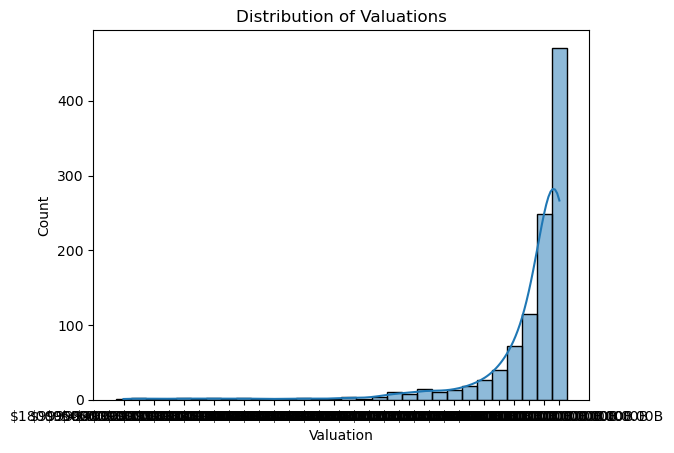

count                         1074
unique                          30
top       $1000000000000000000.00B
freq                           471
Name: Valuation, dtype: object


In [44]:
### Univariate Numerical Example. Analysing a variable.

import seaborn as sns

sns.histplot(df['Valuation'], kde=True)
plt.title('Distribution of Valuations')
plt.show()

print(df['Valuation'].describe())

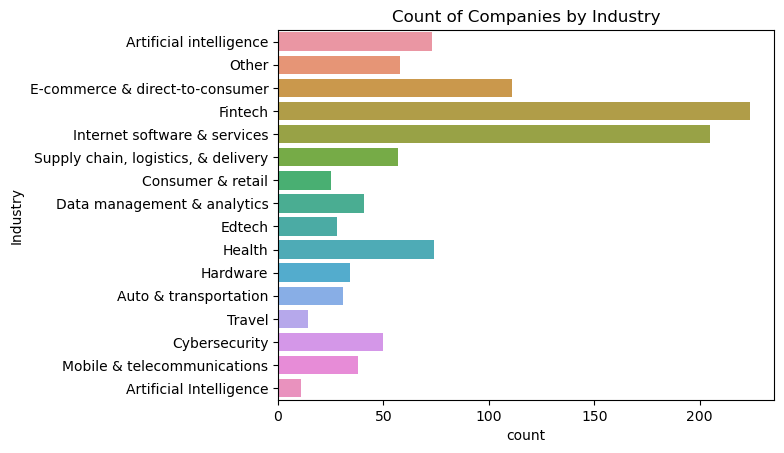

Industry
Fintech                                224
Internet software & services           205
E-commerce & direct-to-consumer        111
Health                                  74
Artificial intelligence                 73
Other                                   58
Supply chain, logistics, & delivery     57
Cybersecurity                           50
Data management & analytics             41
Mobile & telecommunications             38
Hardware                                34
Auto & transportation                   31
Edtech                                  28
Consumer & retail                       25
Travel                                  14
Artificial Intelligence                 11
Name: count, dtype: int64


In [45]:
### Univariate: I'll be using 'Industry' for my categorical example.

sns.countplot(y=df['Industry'])
plt.title('Count of Companies by Industry')
plt.show()

# Frequency of each category
print(df['Industry'].value_counts())



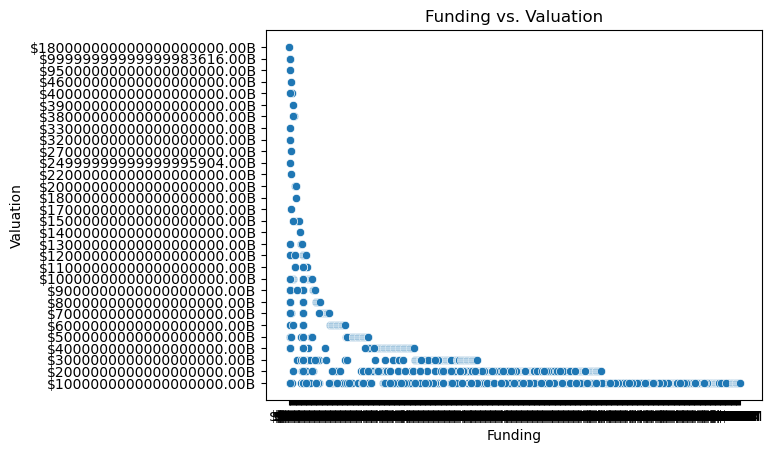

In [46]:
### My Bivariate analysis are as follows:

sns.scatterplot(x='Funding', y='Valuation', data=df)
plt.title('Funding vs. Valuation')
plt.show()


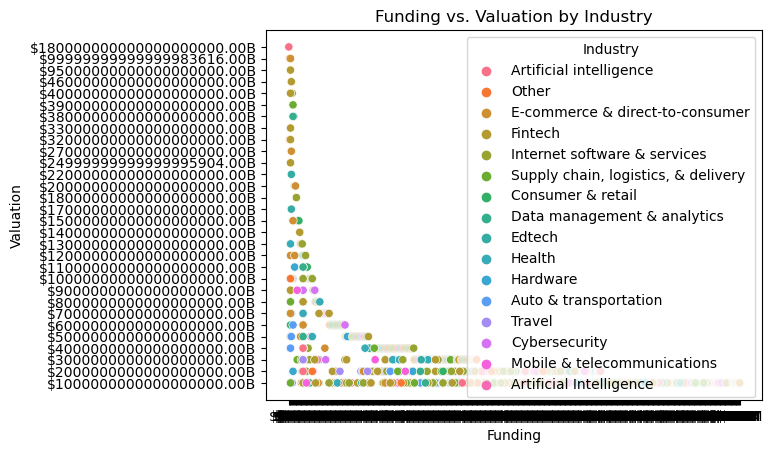

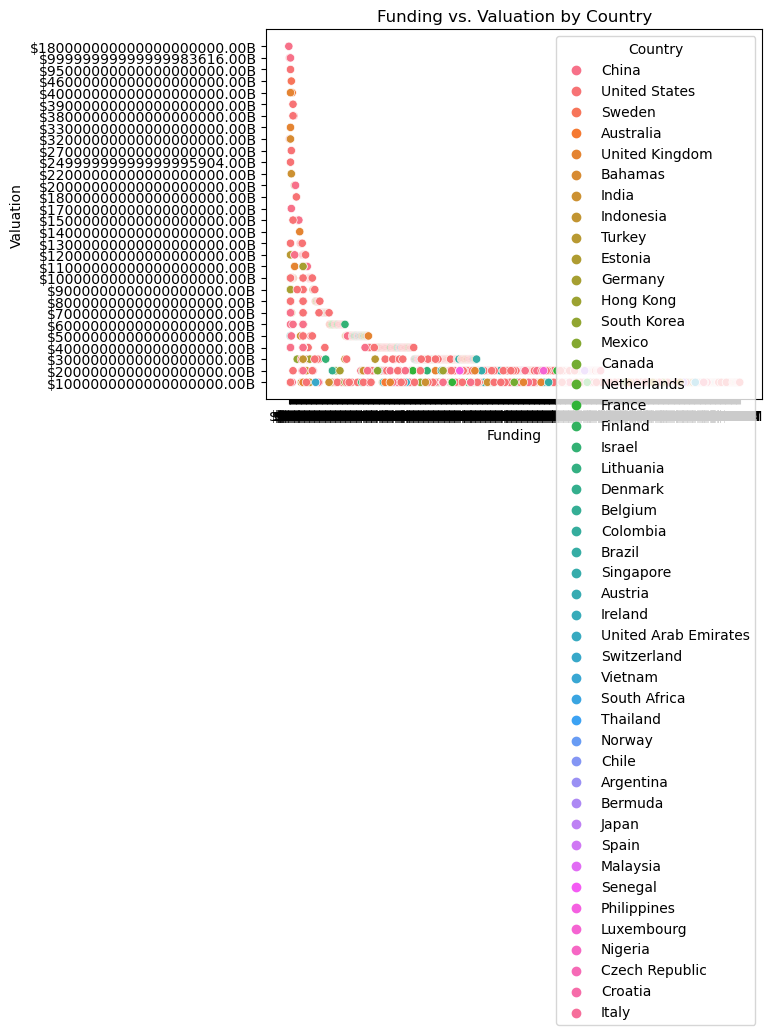

In [49]:
### Multivariate

sns.scatterplot(x='Funding', y='Valuation', hue='Industry', data=df)
plt.title('Funding vs. Valuation by Industry')
plt.show()

sns.scatterplot(x='Funding', y='Valuation', hue='Country', data=df)
plt.title('Funding vs. Valuation by Country')
plt.show()



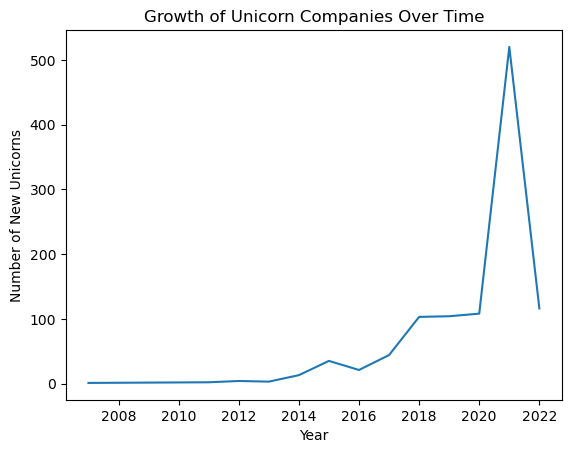

In [52]:
### More insights

### Growth of Unicorn Companies Over Time:
### Analyze how the number of unicorn companies has grown over the years. This can show trends in the global economy, innovation sectors, and investor confidence.

df['Year Joined'] = pd.to_datetime(df['Date Joined']).dt.year
year_counts = df['Year Joined'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values)
plt.title('Growth of Unicorn Companies Over Time')
plt.xlabel('Year')
plt.ylabel('Number of New Unicorns')
plt.show()


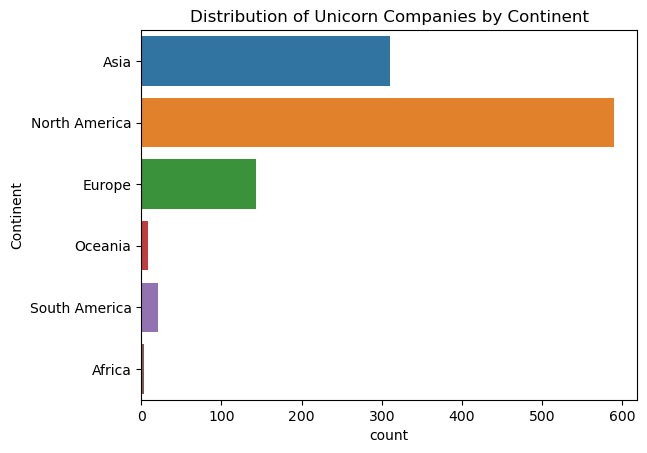

In [53]:
### Distribution of Unicorn Companies Across Continents:
### Understanding the geographical distribution can highlight which regions are leading in innovation and attracting investors.

sns.countplot(y='Continent', data=df)
plt.title('Distribution of Unicorn Companies by Continent')
plt.show()


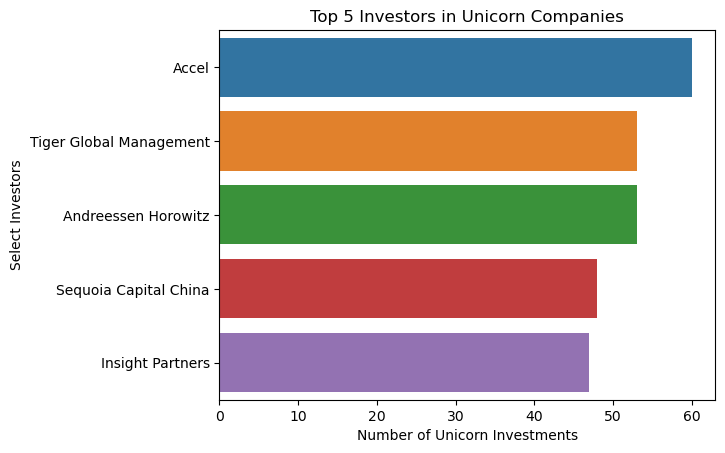

In [56]:
### Investor Participation in Multiple Unicorns:
### Analyze which investors are frequently investing in these high-value companies. This can provide insights into the most influential and successful investors in the startup ecosystem.

# Assuming 'Select Investors' column contains a list of investors for each company
investors = df['Select Investors'].str.split(', ').explode()
top_investors = investors.value_counts().head(5)
sns.barplot(x=top_investors.values, y=top_investors.index)
plt.title('Top 5 Investors in Unicorn Companies')
plt.xlabel('Number of Unicorn Investments')
plt.show()


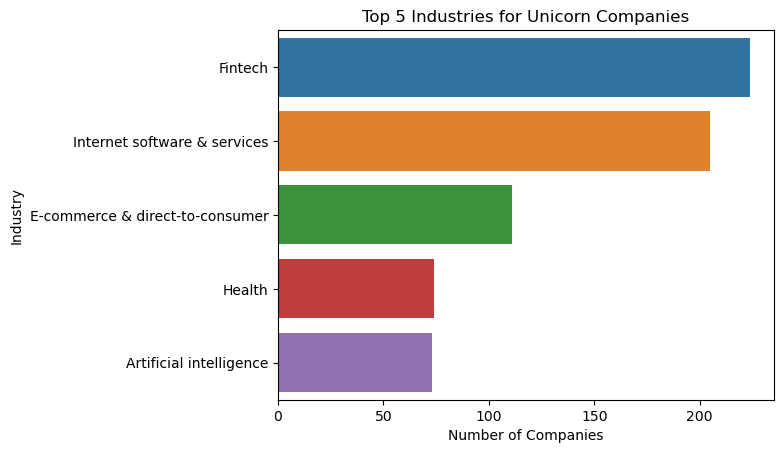

In [57]:
### Top Industries for Unicorns:
### Identify which industries are producing the most unicorns. This can indicate which sectors are currently hot for investment and innovation.

top_industries = df['Industry'].value_counts().head(5)
sns.barplot(x=top_industries.values, y=top_industries.index)
plt.title('Top 5 Industries for Unicorn Companies')
plt.xlabel('Number of Companies')
plt.show()
